In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class ts_preprocessor(object):
    
    def __init__(self):
        self.scaleFactor = 1
    
    def fit_transform(self, data):
        self.scaleFactor = data.max() + 1 if self.scaleFactor == 1.0 else self.scaleFactor
        return np.array([(x / self.scaleFactor) for x in data])
    
    def inverse_transform(self, data):
        return [(x * self.scaleFactor) for x in data]

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('rht_new.csv')
df

,side 1,side 2,side 3
0,3,4,5
1,9,12,15
2,12,16,20
3,15,20,25
4,18,24,30
...,...,...,...
994,2988,3984,4980
995,2991,3988,4985
996,2994,3992,4990
997,2997,3996,4995


In [5]:
X = df[['side 1','side 2']]
y = df['side 3']

In [6]:
X

,side 1,side 2
0,3,4
1,9,12
2,12,16
3,15,20
4,18,24
...,...,...
994,2988,3984
995,2991,3988
996,2994,3992
997,2997,3996


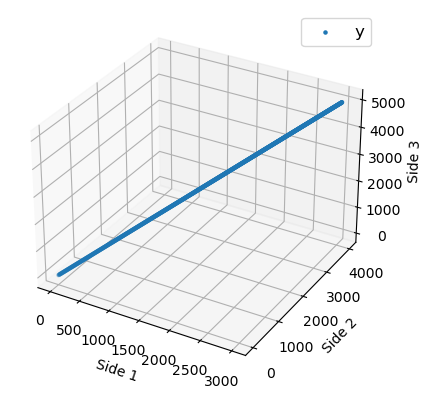

In [7]:
mpl.rcParams['legend.fontsize'] = 12
 
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
 
ax.scatter(X['side 1'], X['side 2'], y, label ='y', s = 5)
ax.set_xlabel('Side 1')
ax.set_ylabel('Side 2')
ax.set_zlabel('Side 3')
ax.legend()
plt.show()

**Clear straight-line --> linear relationship**

In [10]:
model_linear = LinearRegression()
model_linear.fit(X, y)

LinearRegression()

In [11]:
# Set the degree equals to 3
poly_reg = PolynomialFeatures(degree = 3)

In [12]:
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.00000000e+00, 3.00000000e+00, 4.00000000e+00, ...,
        3.60000000e+01, 4.80000000e+01, 6.40000000e+01],
       [1.00000000e+00, 9.00000000e+00, 1.20000000e+01, ...,
        9.72000000e+02, 1.29600000e+03, 1.72800000e+03],
       [1.00000000e+00, 1.20000000e+01, 1.60000000e+01, ...,
        2.30400000e+03, 3.07200000e+03, 4.09600000e+03],
       ...,
       [1.00000000e+00, 2.99400000e+03, 3.99200000e+03, ...,
        3.57844317e+10, 4.77125756e+10, 6.36167675e+10],
       [1.00000000e+00, 2.99700000e+03, 3.99600000e+03, ...,
        3.58921080e+10, 4.78561440e+10, 6.38081919e+10],
       [1.00000000e+00, 3.00000000e+03, 4.00000000e+03, ...,
        3.60000000e+10, 4.80000000e+10, 6.40000000e+10]])

In [13]:
model_linear_2 = LinearRegression()
# fit the model
model_linear_2.fit(X_poly, y)

LinearRegression()

In [14]:
y_poly_pred = model_linear_2.predict(X_poly)
y_poly_pred

array([4.99999887e+00, 1.49999989e+01, 1.99999989e+01, 2.49999989e+01,
       2.99999989e+01, 3.49999989e+01, 3.99999989e+01, 4.49999989e+01,
       4.99999989e+01, 5.49999989e+01, 5.99999989e+01, 6.49999989e+01,
       6.99999989e+01, 7.49999989e+01, 7.99999989e+01, 8.49999989e+01,
       8.99999989e+01, 9.49999989e+01, 9.99999989e+01, 1.04999999e+02,
       1.09999999e+02, 1.14999999e+02, 1.19999999e+02, 1.24999999e+02,
       1.29999999e+02, 1.34999999e+02, 1.39999999e+02, 1.44999999e+02,
       1.49999999e+02, 1.54999999e+02, 1.59999999e+02, 1.64999999e+02,
       1.69999999e+02, 1.74999999e+02, 1.79999999e+02, 1.84999999e+02,
       1.89999999e+02, 1.94999999e+02, 1.99999999e+02, 2.04999999e+02,
       2.09999999e+02, 2.14999999e+02, 2.19999999e+02, 2.24999999e+02,
       2.29999999e+02, 2.34999999e+02, 2.39999999e+02, 2.44999999e+02,
       2.49999999e+02, 2.54999999e+02, 2.59999999e+02, 2.64999999e+02,
       2.69999999e+02, 2.74999999e+02, 2.79999999e+02, 2.84999999e+02,
      

In [15]:
def calculate_rmse(y_true, y_pred):
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]
    mean_squared_error = np.mean(squared_errors)
    rmse = np.sqrt(mean_squared_error)
    return rmse

In [16]:
#Evaluation
print('Test evaluation for quadratic polynomial regressor:\n')
print('R^2 Score:', metrics.r2_score(y, y_poly_pred))
print('RMSE:', calculate_rmse(y, y_poly_pred))
print('Correlation Coefficient (R):', np.corrcoef(y, y_poly_pred)[0, 1])

Test evaluation for quadratic polynomial regressor:

R^2 Score: 1.0
RMSE: 6.301193633481666e-07
Correlation Coefficient (R): 0.9999999999999993


In [17]:
while True:
    print("Please enter the two sides of the triangle\n")
    print("Enter Side A:")
    sidea = float(input())
    print("Enter Side B:")
    sideb = float(input())
    
    # Create a feature array for prediction
    feature_array = np.array([[sidea, sideb]])
    
    # Transform the features using the polynomial regression model
    feature_poly = poly_reg.transform(feature_array)
    
    # Predict the third side using the trained polynomial regression model
    prediction = model_linear_2.predict(feature_poly)
    
    # Print the predicted third side
    print("The predicted Third Side is: {:.2f}\n".format(prediction[0]))
    
# The code will run until you manually stop it (e.g., by pressing Ctrl+C).
print("Done")

Please enter the two sides of the triangle

Enter Side A:
10
Enter Side B:
15
The predicted Third Side is: 18.00

Please enter the two sides of the triangle

Enter Side A:
100
Enter Side B:
150
The predicted Third Side is: 180.00

Please enter the two sides of the triangle

Enter Side A:
58
Enter Side B:
68
The predicted Third Side is: 89.20

Please enter the two sides of the triangle

Enter Side A:
i


ValueError: could not convert string to float: 'i'

### Test 1: Dataset has large value range than that of original

In [18]:
# Create a dataset with side 1 and side 2
new_data = {
    'side 1': np.random.randint(1000, 10001, size=1000),  # Generate random values for side 1
    'side 2': np.random.randint(1000, 10001, size=1000)   # Generate random values for side 2
}

# Calculate side 3 using the Pythagorean theorem
new_data['side 3'] = np.sqrt(new_data['side 1']**2 + new_data['side 2']**2)

# Create a DataFrame
test_df = pd.DataFrame(new_data)
test_df

,side 1,side 2,side 3
0,8403,6062,10361.382775
1,8133,8748,11944.588440
2,4346,2247,4892.517246
3,2883,2983,4148.491051
4,6268,1265,6394.376357
...,...,...,...
995,8018,5214,9564.210370
996,8844,6177,10787.569930
997,3738,9852,10537.293201
998,2806,4195,5046.945710


In [19]:
# Assuming you have already defined your polynomial regression model and poly_reg
X_test = test_df[['side 1', 'side 2']]
y_test = test_df['side 3']

# Transform the test data using the polynomial features
X_test_poly = poly_reg.transform(X_test)

# Predict side_3_predict using the trained polynomial regression model
side_3_predict = model_linear_2.predict(X_test_poly)

In [20]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(metrics.mean_squared_error(y_test, side_3_predict))

# Calculate R^2 score (Coefficient of determination)
r2 = metrics.r2_score(y_test, side_3_predict)

print('RMSE:', rmse)
print('R^2 Score:', r2)
print('Correlation Coefficient (R):', np.corrcoef(y_test, side_3_predict)[0, 1])

RMSE: 1987.7736096505632
R^2 Score: 0.4515843728152298
Correlation Coefficient (R): 0.8440544105076819


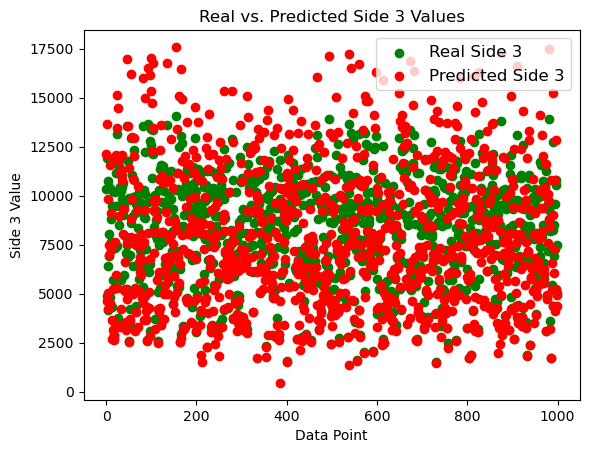

In [21]:
plt.scatter(range(len(y_test)), y_test, color='green', label='Real Side 3')
plt.scatter(range(len(side_3_predict)), side_3_predict, color='red', label='Predicted Side 3')

plt.xlabel('Data Point')
plt.ylabel('Side 3 Value')
plt.legend()
plt.title('Real vs. Predicted Side 3 Values')
plt.show()

### Test 2: Dataset has nearly the same value range with value in original

In [24]:
# Create another dataset with side 1 and side 2
new_data = {
    'side 1': np.random.randint(10, 1001, size=1000),  # Generate random values for side 1
    'side 2': np.random.randint(10, 1001, size=1000)   # Generate random values for side 2
}

# Calculate side 3 using the Pythagorean theorem
new_data['side 3'] = np.sqrt(new_data['side 1']**2 + new_data['side 2']**2)

# Create a DataFrame
test_df = pd.DataFrame(new_data)
test_df

,side 1,side 2,side 3
0,353,882,950.017368
1,584,777,972.000514
2,470,11,470.128706
3,95,682,688.584781
4,891,868,1243.907151
...,...,...,...
995,999,983,1401.531305
996,701,507,865.130048
997,760,353,837.979117
998,780,985,1256.433444


In [25]:
# Assuming you have already defined your polynomial regression model and poly_reg
X_test = test_df[['side 1', 'side 2']]
y_test = test_df['side 3']

# Transform the test data using the polynomial features
X_test_poly = poly_reg.transform(X_test)

# Predict side_3_predict using the trained polynomial regression model
side_3_predict = model_linear_2.predict(X_test_poly)

In [26]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(metrics.mean_squared_error(y_test, side_3_predict))

# Calculate R^2 score (Coefficient of determination)
r2 = metrics.r2_score(y_test, side_3_predict)

print('RMSE:', rmse)
print('R^2 Score:', r2)
print('Correlation Coefficient (R):', np.corrcoef(y_test, side_3_predict)[0, 1])

RMSE: 96.91490682299869
R^2 Score: 0.8752780266793132
Correlation Coefficient (R): 0.9645784253215639


**When values in new dataset are significantly different from raw data -> higher RMSE**

## The polynomial regression model

1.  This makes it easier to identify the linear relationship between the independent and dependent variables, which results in a correlation coefficient of 1 and very low error metrics such as MSQ and RMSE. This indicates that the model has nearly 100% accuracy in predicting the correct answer for inputs that follow the **same rule** as the dataset (*side 1 is a multiple of 3, and side 2 is a multiple of 4,  then side 3 is precisely equal to the square root of the sum of the squares of side 1 and side 2, and side 3 is a multiple of 5 as well , know that they multiplied by the common factor*). Therefore, the **model gets the strongest performance on inputs that follow the same rule as the raw dataset and vice versa**. For example: *in training data, the side 1 is smaller than side 2, so when test values have side 1 values much higher than side 2 values, the results have more error than that of neural network.*


2. Additionally, when I created a **new dataset with randomly generated values near with raw data** for side 1 and side 2, and calculated side 3 based on the right-angle triangle rule, the **polynomial regression model's performance decreased**, as expected. The RMSE increased (97.36 while it was just 6.3 when applied model with the raw dataset) and the R^2 decreased, but the R^2 score was still high at 0.88 (lower than when applied to the raw dataset – 0.9999). **On the contrary**, RMSE significantly rise and R^2 score reduce (under 0.5) when the input value is much higher than raw data. Therefore, **the higher the input (far with the training data), the more error the result.**

